In [2]:
# Import all necessary packages into the notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.image as mpimg

import seaborn as sns
from sklearn import preprocessing
import scipy as sp
import random

from sklearn.model_selection import train_test_split
from sklearn import metrics, svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

import itertools
import folium
import webbrowser

from io import StringIO
from imblearn.over_sampling import SMOTE



In [3]:
# Load the file containing the data into notebook in order to create dataframe

dataframe = pd.read_csv('Downloads/Data-Collisions.csv')

dataframe.head(10)

/Users/melissamallek/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N
5,1,-122.387598,47.690575,6,320840,322340,E919477,Matched,Intersection,36974.0,...,Dry,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
6,1,-122.338485,47.618534,7,83300,83300,3282542,Matched,Intersection,29510.0,...,Wet,Daylight,NaN,8344002.0,NaN,10,Entering at angle,0,0,N
7,2,-122.320780,47.614076,9,330897,332397,EA30304,Matched,Intersection,29745.0,...,Dry,Daylight,NaN,NaN,NaN,5,Vehicle Strikes Pedalcyclist,6855,0,N
8,1,-122.335930,47.611904,10,63400,63400,2071243,Matched,Block,NaN,...,Dry,Daylight,NaN,6166014.0,NaN,32,One parked--one moving,0,0,N
9,2,-122.384700,47.528475,12,58600,58600,2072105,Matched,Intersection,34679.0,...,Dry,Daylight,NaN,6079001.0,NaN,10,Entering at angle,0,0,N


In [4]:
# Organizing the descriptive statistics, pre-processing data and converting the severity code from 1 and 2 to 0 and 1 values

severity_code = dataframe['SEVERITYCODE'].values
labels = preprocessing.LabelEncoder()
labels.fit([1,2])
severity_code = labels.transform(severity_code)
dataframe['SEVERITYCODE'] = severity_code


descriptive_stats = dataframe.describe(include='all')
descriptive_stats

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,194673,194673,192747,65070.000000,...,189661,189503,4667,1.149360e+05,9333,194655,189769,194673.000000,1.946730e+05,194673
unique,NaN,NaN,NaN,NaN,NaN,NaN,194670,2,3,NaN,...,9,9,1,NaN,1,115,62,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,1776526,Matched,Block,NaN,...,Dry,Daylight,Y,NaN,Y,32,One parked--one moving,NaN,NaN,N
freq,NaN,NaN,NaN,NaN,NaN,NaN,2,189786,126926,NaN,...,124510,116137,4667,NaN,9333,27612,44421,NaN,NaN,187457
mean,0.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,NaN,NaN,NaN,37558.450576,...,NaN,NaN,NaN,7.972521e+06,NaN,NaN,NaN,269.401114,9.782452e+03,NaN
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,NaN,NaN,NaN,51745.990273,...,NaN,NaN,NaN,2.553533e+06,NaN,NaN,NaN,3315.776055,7.226926e+04,NaN
min,0.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,NaN,NaN,NaN,23807.000000,...,NaN,NaN,NaN,1.007024e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
25%,0.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,NaN,NaN,NaN,28667.000000,...,NaN,NaN,NaN,6.040015e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
50%,0.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,NaN,NaN,NaN,29973.000000,...,NaN,NaN,NaN,8.023022e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
75%,1.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,NaN,NaN,NaN,33973.000000,...,NaN,NaN,NaN,1.015501e+07,NaN,NaN,NaN,0.000000,0.000000e+00,NaN


In [5]:
# Look at descriptive statistics to consider the counts of each variable I am interested in analyzing 

descriptive_frame = descriptive_stats[['SEVERITYCODE','ADDRTYPE','INATTENTIONIND','UNDERINFL','WEATHER','ROADCOND','LIGHTCOND','SPEEDING']]
descriptive_frame.drop(['unique','top','freq','mean','std','min','max','25%','50%','75%'],axis=0,inplace=True)
descriptive_frame = descriptive_frame.transpose()

descriptive_frame

/Users/melissamallek/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,count
SEVERITYCODE,194673
ADDRTYPE,192747
INATTENTIONIND,29805
UNDERINFL,189789
WEATHER,189592
ROADCOND,189661
LIGHTCOND,189503
SPEEDING,9333


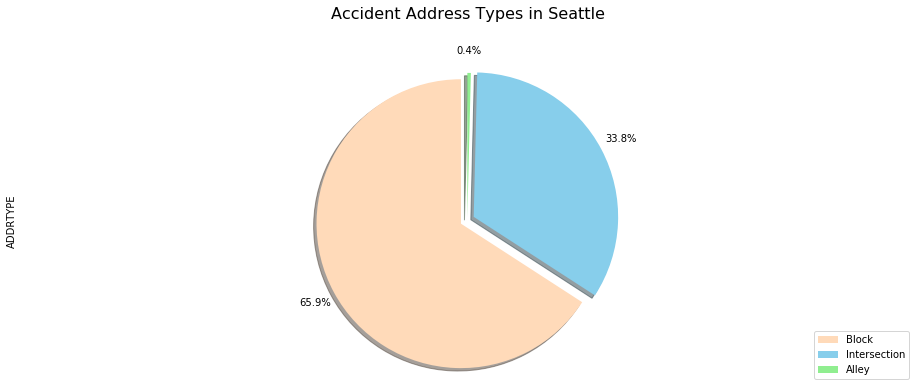

In [6]:
# Plot a pie chart that compares the address types of each accident to determine significance

colors_list = ['peachpuff','skyblue','lightgreen']
explode_list = [.05, .05, .02]

address_type = dataframe['ADDRTYPE'].value_counts()

address_type.plot(kind='pie', figsize=(16,6), autopct= '%1.1f%%', startangle=90, shadow=True, labels=None, 
                 pctdistance=1.15, colors=colors_list, explode=explode_list)

plt.title('Accident Address Types in Seattle', fontsize = 16, y=1.1)
plt.axis('equal')
plt.legend(labels=address_type.index, loc='lower right')

plt.show()

In [7]:
# Encoding the various variables to structure the data in a more organized way

df = dataframe.copy()

# Address types --- 0 = Block, 1 = Intersection, 2 = Alley

df['ADDRTYPE'].replace("Block", 0, inplace=True)
df['ADDRTYPE'].replace("Intersection", 1, inplace=True)
df['ADDRTYPE'].replace("Alley", 2, inplace=True)

# Inattention index --- 0 = No, 1 = Yes

df['INATTENTIONIND'].replace(np.nan, 0, inplace=True)
df['INATTENTIONIND'].replace('Y', 1, inplace=True)

# Under the influence index --- 0 = No, 1 = Yes

df['UNDERINFL'].replace('N', 0, inplace=True)
df['UNDERINFL'].replace('Y', 1, inplace=True)

# Weather index --- 0 = Clear, 1 = Cloudy/Overcast, 2 = Fog/Windy, 3 = Rain/Snow

df['WEATHER'].replace('Clear', 0, inplace=True)
df['WEATHER'].replace('Raining', 3, inplace=True)
df['WEATHER'].replace('Overcast', 1, inplace=True)
df['WEATHER'].replace('Snowing', 3, inplace=True)
df['WEATHER'].replace('Other', 'Unknown', inplace=True)
df['WEATHER'].replace('Fog/Smog/Smoke', 2, inplace=True)
df['WEATHER'].replace('Sleet/Hail/Freezing Rain', 3, inplace=True)
df['WEATHER'].replace('Blowing Sand/Dirt', 2, inplace=True)
df['WEATHER'].replace('Severe Crosswind', 2, inplace=True)
df['WEATHER'].replace('Partly Cloudy', 1, inplace=True)

# Road conditions index --- 0 = Dry conditions, 1 = Mixed conditions, 2 = Wet conditions

df['ROADCOND'].replace('Dry', 0, inplace=True)
df['ROADCOND'].replace('Wet', 2, inplace=True)
df['ROADCOND'].replace('Ice', 2, inplace=True)
df['ROADCOND'].replace('Snow/Slush', 1, inplace=True)
df['ROADCOND'].replace('Other', 'Unknown', inplace=True)
df['ROADCOND'].replace('Standing Water', 2, inplace=True)
df['ROADCOND'].replace('Sand/Mud/Dirt', 0, inplace=True)
df['ROADCOND'].replace('Oil', 1, inplace=True)

# Light conditions index --- 0 = Light visibility, 1 = Medium visibility, 2 = Dark visibility

df['LIGHTCOND'].replace('Daylight', 0, inplace=True)
df['LIGHTCOND'].replace('Dark - Street Lights On', 1, inplace=True)
df['LIGHTCOND'].replace('Dusk', 1, inplace=True)
df['LIGHTCOND'].replace('Dawn', 1, inplace=True)
df['LIGHTCOND'].replace('Dark - No Street Lights', 2, inplace=True)
df['LIGHTCOND'].replace('Dark - Street Lights Off', 2, inplace=True)
df['LIGHTCOND'].replace('Other', 'Unknown', inplace=True)
df['LIGHTCOND'].replace('Dark - Unknown Lighting', 2, inplace=True)

# Speeding index --- 0 = No, 1 = Yes

df['SPEEDING'].replace(np.nan, 0, inplace=True)
df['SPEEDING'].replace('Y', 1, inplace=True)



In [8]:
# Only keep necessary columns/values

needed_columns = df[['SEVERITYCODE','X','Y','INCKEY','INATTENTIONIND','UNDERINFL','WEATHER','ROADCOND','LIGHTCOND','SPEEDING']]
new_df = needed_columns.copy()

new_df.dropna(axis=0, how='any', inplace=True)
new_stats = new_df.describe()


In [9]:
# Normalize unknown weather conditions


weather_feature = new_df['WEATHER'] == 'Unknown'

weather = new_df['WEATHER'].values
weather = weather[weather_feature]

weather[0:9378] = 0
weather[9378:11714] = 1
weather[11714:11768] = 2
weather[11768:14611] = 3

new_df.loc[new_df.WEATHER == 'Unknown', 'WEATHER'] = weather
new_df['WEATHER'] = new_df['WEATHER'].astype(int)



In [10]:
# Normalize unknown road conditions

road_feature = new_df['ROADCOND'] == 'Unknown'

road_cond = new_df['ROADCOND'].values
road_cond = road_cond[road_feature]

road_cond[0:9963] = 0
road_cond[9963:10048] = 1
road_cond[10048:13911] = 2

new_df.loc[new_df.ROADCOND == 'Unknown', 'ROADCOND'] = road_cond
new_df['ROADCOND'] = new_df['ROADCOND'].astype(int)


In [11]:
# Normalize unknown light conditions

light_feature = new_df['LIGHTCOND'] == 'Unknown'

light_cond = new_df['LIGHTCOND'].values
light_cond = light_cond[light_feature]

light_cond[0:8340] = 0
light_cond[8340:12413] = 1
light_cond[12413:12604] = 2

new_df.loc[new_df.LIGHTCOND == 'Unknown', 'LIGHTCOND'] = light_cond
new_df['LIGHTCOND'] = new_df['LIGHTCOND'].astype(int)

In [12]:
# Ensure remaining data is converted into integers

new_df['INATTENTIONIND'] = new_df['INATTENTIONIND'].astype(int)

new_df['UNDERINFL'] = new_df['UNDERINFL'].astype(int)

new_df['SPEEDING'] = new_df['SPEEDING'].astype(int)



In [13]:
# Set up variable sets for test/train split 

X = new_df[['INATTENTIONIND','UNDERINFL','WEATHER','ROADCOND','LIGHTCOND','SPEEDING']].values
y = new_df[['SEVERITYCODE']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 4)
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (128916, 6) (128916, 1)
Test set: (55251, 6) (55251, 1)


In [14]:
# Make sure that data is balanced

os = SMOTE(random_state = 0)

os_X_data, os_y_data = os.fit_sample(X_train, y_train)


In [15]:
# Create decision tree classifier and then fit model + make prediction

DT = DecisionTreeClassifier(criterion='entropy', max_depth = 6)

DT.fit(os_X_data, os_y_data)

yhatDT = DT.predict(X_test)

In [16]:
# Determine accuracy of decision tree classifier 
from sklearn.metrics import accuracy_score, f1_score, log_loss, classification_report, confusion_matrix, jaccard_score

print('Accuracy score of decision tree:', accuracy_score(yhatDT, y_test))


Accuracy score of decision tree: 0.5947041682503484


In [17]:
# Look at the data of the determined accuracy 

print('Decision Tree - Confusion Matrix')
print(pd.crosstab(y_test.ravel(), yhatDT.ravel(), rownames = ['True'], colnames = ['Predicted'], margins = True))


Decision Tree - Confusion Matrix
Predicted      0      1    All
True                          
0          26373  12072  38445
1          10321   6485  16806
All        36694  18557  55251


In [18]:
# Look at classification report of decision tree accuracy

print(classification_report(yhatDT,y_test))


              precision    recall  f1-score   support

           0       0.69      0.72      0.70     36694
           1       0.39      0.35      0.37     18557

    accuracy                           0.59     55251
   macro avg       0.54      0.53      0.53     55251
weighted avg       0.59      0.59      0.59     55251



Confusion Matrix is not normalized
[[ 6485 10321]
 [12072 26373]]


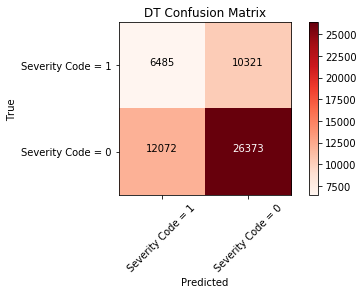

In [19]:
# Setting up the function to plot and visualize the confusion matrix (with added feature to normalize)

def plot_confusion_matrix(cm, classes,
                         normalize = False,
                         title = 'Confusion Matrix',
                         cmap = plt.cm.Reds):
    if normalize == True:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('Confusion Matrix is normalized')
    else:
        print('Confusion Matrix is not normalized')
        
    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True')
    plt.xlabel('Predicted')

cnf_matrix = confusion_matrix(y_test, yhatDT, labels=[1,0])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes = ['Severity Code = 1','Severity Code = 0'], normalize = False,  title = 'DT Confusion Matrix')


In [20]:
# Create logistic regression model and predict

LR = LogisticRegression(C=0.01, solver='liblinear').fit(os_X_data, os_y_data)

yhatLR = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)


In [28]:
# Determine accuracy of logistic regression model

print('Log loss of logistic regression model:', log_loss(y_test, yhat_prob))
print ("Accuracy score of logistic regression model:", accuracy_score(yhatLR,y_test))
print (classification_report(y_test, yhatLR))


Log loss of logistic regression model: 0.6888403324560156
Accuracy score of logistic regression model: 0.595536732366835
              precision    recall  f1-score   support

           0       0.72      0.69      0.70     38445
           1       0.35      0.38      0.37     16806

    accuracy                           0.60     55251
   macro avg       0.53      0.54      0.53     55251
weighted avg       0.61      0.60      0.60     55251



Confusion Matrix is not normalized
[[ 6465 10341]
 [12006 26439]]


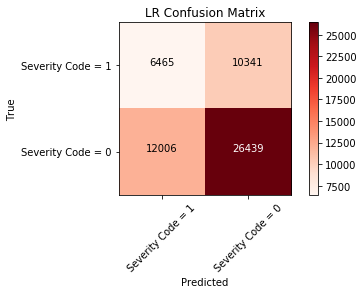

In [22]:
# Plot confusion matrix from logistic regression model

cnf_matrix2 = confusion_matrix(y_test, yhatLR, labels=[1,0])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix2, classes = ['Severity Code = 1','Severity Code = 0'], normalize= False, title = 'LR Confusion Matrix')


In [23]:
# Create Support Vector Machine (SVM) model

svm_model = svm.SVC(kernel='rbf')
# svm_model.fit(X_train, y_train)

svm_model.fit(os_X_data, os_y_data)


SVC()

In [24]:
# Predict values from SVM model

yhatSVM = svm_model.predict(X_test)

In [25]:
# Determine accuracy of the SVM model

print ("Accuracy of SVM model:", accuracy_score(yhatSVM, y_test))
print (classification_report(y_test, yhatSVM))


Accuracy of SVM model: 0.5758628803098587
              precision    recall  f1-score   support

           0       0.72      0.64      0.68     38445
           1       0.34      0.44      0.38     16806

    accuracy                           0.58     55251
   macro avg       0.53      0.54      0.53     55251
weighted avg       0.61      0.58      0.59     55251



Confusion Matrix is not normalized
[[ 7319  9487]
 [13947 24498]]


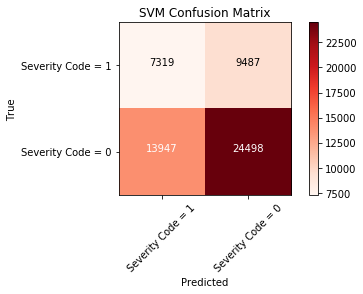

In [26]:
# Set up and plot confusion matrix for the SVM model 

cnf_matrix3 = confusion_matrix(y_test, yhatSVM, labels=[1,0])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix3, classes = ['Severity Code = 1','Severity Code = 0'], normalize= False, title = 'SVM Confusion Matrix')